# Encoder-Decoder-CNN

# A simple synthetic data

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
import random

def get_sin_wave(noise = 0.05, points = 1000):
    
    sin_wave = []
    c = 0.1
    for i in range(points):
        n = random.random()*noise
        sin_wave.append(c*i+10*math.sin(i*0.05+n)+3*math.sin(i*0.1))
    
    sin_wave = np.array(sin_wave)
    
    return sin_wave

In [8]:
seq_len = 20

def get_Data(sin_wave):
    X = []
    Y = []
    num_records = len(sin_wave) - seq_len

    for i in range(num_records):
        X.append(sin_wave[i:i+seq_len])
        Y.append(sin_wave[i+seq_len])

    X = np.array(X)
    #X = np.expand_dims(X, axis=2)

    Y = np.array(Y)
    #Y = np.expand_dims(Y, axis=1)
    
    return X,Y

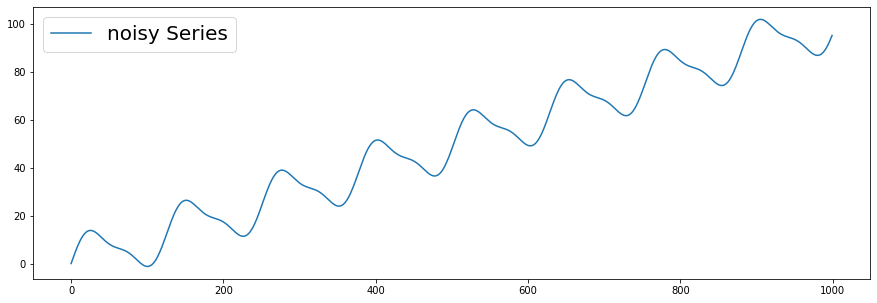

(980, 20) (980,)


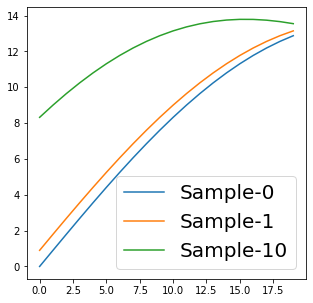

In [10]:
# Training Data

sin_wave = get_sin_wave(noise=0.0)
plt.figure(figsize=(15, 5))
plt.plot(sin_wave, label='noisy Series')
plt.legend(fontsize=20)
plt.show()

X,Y = get_Data(sin_wave)
print(X.shape, Y.shape)

plt.figure(figsize=(5, 5))
plt.plot(X[0], label='Sample-0')
plt.plot(X[1], label='Sample-1')
plt.plot(X[10], label='Sample-10')
plt.legend(fontsize=20)
plt.show()

# Encoder-decoder-CNN

In [12]:
# 1D-CNN
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.Input((X.shape[1], )))

model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))

#Now we do decoder
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(X.shape[1]))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredError())


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_13 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_14 (Dense)             (None, 20)                340       
Total params: 1,028
Trainable params: 1,028
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X, X, batch_size=64, epochs=300,verbose=1)

Epoch 1/300
980/980 [==============================] - 0s 267us/sample - loss: 3306.8096
Epoch 2/300
980/980 [==============================] - 0s 20us/sample - loss: 2996.5513
Epoch 3/300
980/980 [==============================] - 0s 21us/sample - loss: 2614.9974
Epoch 4/300
980/980 [==============================] - 0s 20us/sample - loss: 2085.1783
Epoch 5/300
980/980 [==============================] - 0s 19us/sample - loss: 1601.5163
Epoch 6/300
980/980 [==============================] - 0s 18us/sample - loss: 1194.3953
Epoch 7/300
980/980 [==============================] - 0s 16us/sample - loss: 853.7793
Epoch 8/300
980/980 [==============================] - 0s 16us/sample - loss: 590.6420
Epoch 9/300
980/980 [==============================] - 0s 16us/sample - loss: 388.5515
Epoch 10/300
980/980 [==============================] - 0s 16us/sample - loss: 242.3095
Epoch 11/300
980/980 [==============================] - 0s 16us/sample - loss: 138.9870
Epoch 12/300
980/980 [============

980/980 [==============================] - 0s 15us/sample - loss: 0.1283
Epoch 97/300
980/980 [==============================] - 0s 16us/sample - loss: 0.1280
Epoch 98/300
980/980 [==============================] - 0s 15us/sample - loss: 0.1282
Epoch 99/300
980/980 [==============================] - 0s 14us/sample - loss: 0.1274
Epoch 100/300
980/980 [==============================] - 0s 15us/sample - loss: 0.1260
Epoch 101/300
980/980 [==============================] - 0s 16us/sample - loss: 0.1280
Epoch 102/300
980/980 [==============================] - 0s 16us/sample - loss: 0.1264
Epoch 103/300
980/980 [==============================] - 0s 16us/sample - loss: 0.1234
Epoch 104/300
980/980 [==============================] - 0s 16us/sample - loss: 0.1247
Epoch 105/300
980/980 [==============================] - 0s 15us/sample - loss: 0.1234
Epoch 106/300
980/980 [==============================] - 0s 15us/sample - loss: 0.1209
Epoch 107/300
980/980 [==============================] - 0s 

980/980 [==============================] - 0s 16us/sample - loss: 0.0652
Epoch 191/300
980/980 [==============================] - 0s 16us/sample - loss: 0.0626
Epoch 192/300
980/980 [==============================] - 0s 15us/sample - loss: 0.0626
Epoch 193/300
980/980 [==============================] - 0s 16us/sample - loss: 0.0592
Epoch 194/300
980/980 [==============================] - 0s 17us/sample - loss: 0.0592
Epoch 195/300
980/980 [==============================] - 0s 16us/sample - loss: 0.0568
Epoch 196/300
980/980 [==============================] - 0s 16us/sample - loss: 0.0562
Epoch 197/300
980/980 [==============================] - 0s 15us/sample - loss: 0.0560
Epoch 198/300
980/980 [==============================] - 0s 15us/sample - loss: 0.0551
Epoch 199/300
980/980 [==============================] - 0s 15us/sample - loss: 0.0534
Epoch 200/300
980/980 [==============================] - 0s 15us/sample - loss: 0.0562
Epoch 201/300
980/980 [==============================] - 

980/980 [==============================] - 0s 16us/sample - loss: 0.0100
Epoch 285/300
980/980 [==============================] - 0s 16us/sample - loss: 0.0096
Epoch 286/300
980/980 [==============================] - 0s 17us/sample - loss: 0.0095
Epoch 287/300
980/980 [==============================] - 0s 16us/sample - loss: 0.0263
Epoch 288/300
980/980 [==============================] - 0s 16us/sample - loss: 0.0207
Epoch 289/300
980/980 [==============================] - 0s 17us/sample - loss: 0.0099
Epoch 290/300
980/980 [==============================] - 0s 17us/sample - loss: 0.0113
Epoch 291/300
980/980 [==============================] - 0s 17us/sample - loss: 0.0101
Epoch 292/300
980/980 [==============================] - 0s 17us/sample - loss: 0.0111
Epoch 293/300
980/980 [==============================] - 0s 16us/sample - loss: 0.0180
Epoch 294/300
980/980 [==============================] - 0s 17us/sample - loss: 0.0218
Epoch 295/300
980/980 [==============================] - 

In [15]:
X_pred = model.predict(X)

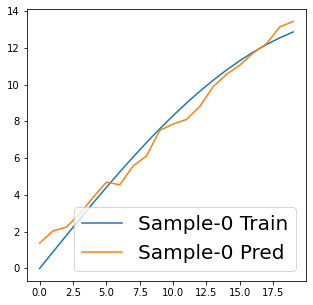

In [16]:
plt.figure(figsize=(5, 5))
plt.plot(X[0], label='Sample-0 Train')
plt.plot(X_pred[0], label='Sample-0 Pred')

plt.legend(fontsize=20)
plt.show()

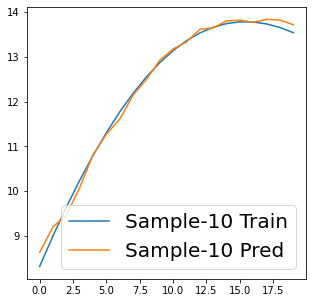

In [17]:
plt.figure(figsize=(5, 5))
plt.plot(X[10], label='Sample-10 Train')
plt.plot(X_pred[10], label='Sample-10 Pred')

plt.legend(fontsize=20)
plt.show()

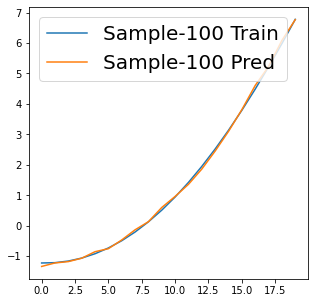

In [18]:
plt.figure(figsize=(5, 5))
plt.plot(X[100], label='Sample-100 Train')
plt.plot(X_pred[100], label='Sample-100 Pred')

plt.legend(fontsize=20)
plt.show()